# IBM HR Analytics Employee Attrition & Performance

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm 

from sklearn.feature_selection import RFECV
from sklearn import datasets
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from scipy.stats import norm, kurtosis
from sklearn.decomposition import PCA
from scipy.stats import norm, kurtosis
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import FastICA
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import plot_tree

%matplotlib inline
warnings.filterwarnings('ignore') #new


def display_metrics(classifierName, Y_pred, Y_true):
    print ("______________________________________________")
    print ("Model: "+classifierName)
    acc, precision, recall, f1score, auc = classification_metrics(Y_pred, Y_true)

    print ("Accuracy: "+str(acc))
    print ("Precision: "+str(precision))
    print ("Recall: "+str(recall))
    print ("F1-score: "+str(f1score))
    print ("AUC: "+str(auc))
    print ("______________________________________________")
    print ("")
    
def classification_metrics(Y_pred, Y_true):
    acc = accuracy_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    f1score = f1_score(Y_true, Y_pred)
    auc = roc_auc_score(Y_true, y_pred)

    return acc, precision, recall, f1score, auc

    
def display_metrics_acc(classifierName,Y_pred,Y_true):
    acc, precision, recall, f1score, auc = classification_metrics(Y_pred,Y_true)
    
    return acc

def display_metrics_precision(classifierName,Y_pred,Y_true):
    acc, precision, recall, f1score, auc = classification_metrics(Y_pred,Y_true)
    
    return precision

### Read in the data & Basic Exploration

In [5]:
data = pd.read_csv('ibmhr.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Main Analysis 
There are four models in the main analysis, namely Random Forest, Decision Tree, Logistic Regression, and Support Vector Machine.   The "Attrition" indicates whether the employee has left or not, if it is "1", the employee has left; if it is "0", the employee has not yet left. As "Attrition" our predictor variables. 

In this machine learning research, the target variables will be divided into three groups in order to determine which group has the highest model performance and accuracy, as well as to determine which features and factors have the most impact on the prediction model.

Set 1. Use RFECV method and contains the ranked variables 

Set 2. contains all variables except non-numerical and strongly correlated variables

Set 3. contains all variables and dummy all non-numerical variables



### RFECV
### Train the set

In [6]:
df = data.copy()

cat_feats = ['Gender','JobRole','BusinessTravel','Department','EducationField','MaritalStatus'] 
df = pd.get_dummies(data, columns=cat_feats, drop_first = True)
df = df.drop(['Over18'], axis=1)
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['PerformanceRating'] = df['PerformanceRating'].map({3: 0, 4: 1})

target_variable_name = 'Attrition'
target = df[target_variable_name].copy()

df = df.drop(target_variable_name, axis=1).copy()

In [7]:
estimator_LR = LogisticRegression(C=2.1, penalty='l2',  solver='liblinear')
selector_LR = RFECV(estimator_LR, step=1, cv=5,scoring='roc_auc', n_jobs = -1)
selector_LR = selector_LR.fit(df, target)
print('Number of features :', selector_LR.n_features_)
print('Best features :', df.columns[selector_LR.support_])


Number of features : 41
Best features : Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Me

In [8]:
test = data.copy()

cat_feats = ['Gender','JobRole','BusinessTravel','Department','EducationField','MaritalStatus'] 
test = pd.get_dummies(data, columns=cat_feats, drop_first = True)
test = test.drop(['Over18'], axis=1)
test['OverTime'] = test['OverTime'].map({'Yes': 1, 'No': 0})
test['Attrition'] = test['Attrition'].map({'Yes': 1, 'No': 0})
test['PerformanceRating'] = test['PerformanceRating'].map({3: 0, 4: 1})

In [9]:
predictors1 = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'MaritalStatus_Married', 'MaritalStatus_Single']

predictors2 = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'MaritalStatus_Married', 'MaritalStatus_Single']+[i for i in df.columns if i.startswith('Gender')][1:]

In [10]:
X = test[predictors2] 
y = test['Attrition']
print('X variables:\n', [i for i in X.columns])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X variables:
 ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'MaritalStatus_Married', 'MaritalStatus_Single']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Decision Tree 1

Feature ranking:
                             Feature Total Reduction of Criterion
0                           OverTime                     0.198644
1                           JobLevel                     0.117964
2                  TotalWorkingYears                     0.090664
3                   DistanceFromHome                     0.065117
4                  PercentSalaryHike                     0.061935
5               MaritalStatus_Single                     0.053799
6            YearsSinceLastPromotion                     0.053114
7                                Age                     0.050105
8                     YearsAtCompany                     0.040553
9                   Department_Sales                     0.039141
10                  StockOptionLevel                     0.037063
11              YearsWithCurrManager                     0.029724
12           EnvironmentSatisfaction                     0.028225
13                   JobSatisfaction                      0

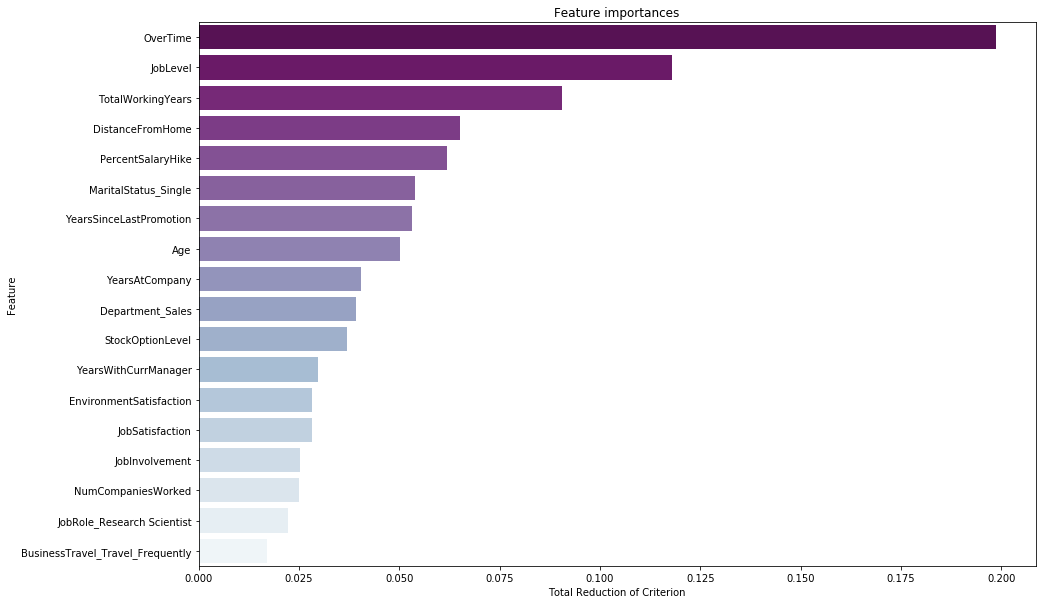

In [12]:
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
model_dt.fit(X_train, y_train)
importances = model_dt.feature_importances_ 
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

feature_names = X_train.columns 

fi = pd.DataFrame([feature_names[indices[0:18]], importances[indices][0:18]])
fi = fi.T
fi.columns = ['Feature', 'Total Reduction of Criterion']

print(fi)

plt.figure(figsize=(15,10))
plt.title("Feature importances")

sns.barplot(x="Total Reduction of Criterion", y="Feature", data=fi, palette="BuPu_r")

In [13]:
y_pred = model_dt.predict(X_test)
confusion_matrix_results = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n', confusion_matrix_results)
display_metrics('Decision Tree', y_pred, y_test)

confusion matrix: 
 [[365  15]
 [ 50  11]]
______________________________________________
Model: Decision Tree
Accuracy: 0.8526077097505669
Precision: 0.4230769230769231
Recall: 0.18032786885245902
F1-score: 0.2528735632183908
AUC: 0.5704270923209663
______________________________________________



In [14]:
accuracies_dt4 = []
max_depth = [5,6,7,8,9]
for i in max_depth: 
    model_dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=i)
    model_dt.fit(X_train, y_train)
    y_pred = model_dt.predict(X_test)
    acc = display_metrics_acc('Decision Tree',y_pred,y_test)
    
    accuracies_dt4.append(acc)
    
accuracies_dt4

[0.8526077097505669,
 0.8435374149659864,
 0.8321995464852607,
 0.8231292517006803,
 0.8027210884353742]

### Random Forest 4

Feature ranking:
                     Feature Total Reduction of Criterion
0                        Age                     0.081285
1          TotalWorkingYears                     0.064504
2                   OverTime                     0.059334
3           DistanceFromHome                     0.056896
4             YearsAtCompany                     0.053663
5         NumCompaniesWorked                      0.04697
6          PercentSalaryHike                     0.043613
7       YearsWithCurrManager                     0.040827
8         YearsInCurrentRole                     0.038954
9           StockOptionLevel                     0.036456
10     TrainingTimesLastYear                      0.03571
11   EnvironmentSatisfaction                      0.03272
12           JobSatisfaction                     0.032381
13   YearsSinceLastPromotion                     0.032163
14                  JobLevel                     0.031967
15  RelationshipSatisfaction                     0.0314

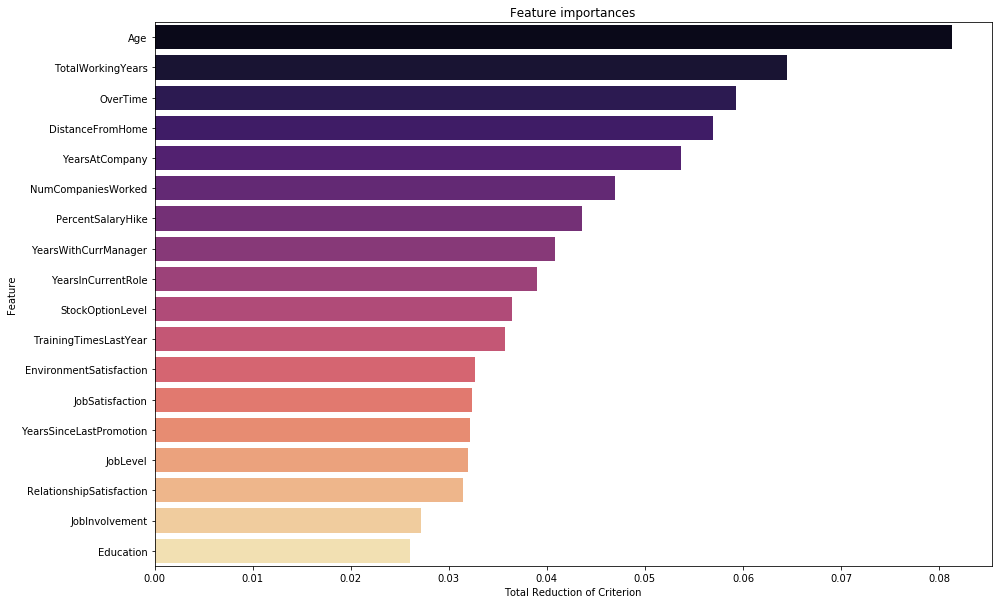

In [15]:
model_rf = RandomForestClassifier(n_estimators=500, random_state=101)
model_rf.fit(X_train, y_train)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

feature_names = X_train.columns 

fi = pd.DataFrame([feature_names[indices[0:18]], importances[indices][0:18]])
fi = fi.T
fi.columns = ['Feature', 'Total Reduction of Criterion']
print(fi)


plt.figure(figsize=(15,10))
plt.title("Feature importances")

sns.set_color_codes("pastel")
sns.barplot(x="Total Reduction of Criterion", y="Feature", data=fi, palette="magma")

In [16]:
y_pred = model_rf.predict(X_test)
confusion_matrix_results = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n', confusion_matrix_results)
display_metrics('Random Forest', y_pred, y_test)

confusion matrix: 
 [[377   3]
 [ 55   6]]
______________________________________________
Model: Random Forest
Accuracy: 0.8684807256235828
Precision: 0.6666666666666666
Recall: 0.09836065573770492
F1-score: 0.1714285714285714
AUC: 0.5452329594477998
______________________________________________



In [17]:
accuracies_rf4 = []
random_forest = [10,100,250,500,750]
for i in random_forest: 
    model_rf = RandomForestClassifier(n_estimators=i, random_state=101)
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)
    confusion_matrix_results = confusion_matrix(y_test, y_pred)
    acc = display_metrics_acc('Random Forest', y_pred, y_test)
    accuracies_rf4.append(acc)
    
accuracies_rf4

[0.8752834467120182,
 0.8684807256235828,
 0.8639455782312925,
 0.8684807256235828,
 0.8662131519274376]

### Logistic Regression 4

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)
display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[369  11]
 [ 39  22]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.8866213151927438
Precision: 0.6666666666666666
Recall: 0.36065573770491804
F1-score: 0.4680851063829787
AUC: 0.6658541846419327
______________________________________________



In [19]:
accuracies_lr4 = []
test_sizes = [0.3, 0.4, 0.5, 0.6, 0.7]
for i in test_sizes: 
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc, precision, recall, f1score, auc = classification_metrics(y_pred, y_test)
    
    accuracies_lr4.append(acc)
    
round(np.mean(accuracies_lr4),2)

0.88

In [20]:
accuracies_lr4

[0.8866213151927438,
 0.9030612244897959,
 0.8829931972789116,
 0.8752834467120182,
 0.8620019436345967]

In [21]:
model = sm.Logit(y, X)
result = model.fit() 
result.summary()

         Current function value: 0.292809
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1429
Method:                           MLE   Df Model:                           40
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                  0.3371
Time:                        04:18:38   Log-Likelihood:                -430.43
converged:                      False   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.327e-68
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0313      0.014     -2.319      0.020      -0.058      -0.005
DistanceFromHome                      0.0458      0.011      4.271      0.000       0.025       0.067
Education                             0.0034      0.087      0.039      0.969      -0.168       0.175
EnvironmentSatisfaction              -0.4334      0.083     -5.242      0.000      -0.595      -0.271
JobInvolvement                       -0.5314      0.122     -4.348      0.000      -0.771      -0.292
JobLevel                             -0.0543      0.231     -0.235      0.814      -0.507       0.398
JobSatisfaction                      -0.4186      0.081     -5.156      0.000      -0.578      -0.259
NumCompaniesWorked                    0.1937      0.039      5.013      0.000       0.118       0.269
OverTime                              1.9705      0.193     10.214      0.000       1.592       2.349
PercentSalaryHike                    -0.0218      0.039     -0.557      0.577      -0.098       0.055
PerformanceRating                     0.1041      0.396      0.263      0.792      -0.671       0.880
RelationshipSatisfaction             -0.2571      0.082     -3.121      0.002      -0.419      -0.096
StandardHours                        -0.2510   1063.884     -0.000      1.000   -2085.425    2084.923
StockOptionLevel                     -0.2088      0.157     -1.332      0.183      -0.516       0.098
TotalWorkingYears                    -0.0610      0.029     -2.087      0.037      -0.118      -0.004
TrainingTimesLastYear                -0.1920      0.073     -2.630      0.009      -0.335      -0.049
WorkLifeBalance                      -0.3632      0.123     -2.943      0.003      -0.605      -0.121
YearsAtCompany                        0.0945      0.039      2.429      0.015       0.018       0.171
YearsInCurrentRole                   -0.1516      0.045     -3.356      0.001      -0.240      -0.063
YearsSinceLastPromotion               0.1782      0.042      4.244      0.000       0.096       0.261
YearsWithCurrManager                 -0.1350      0.047     -2.878      0.004      -0.227      -0.043
Gender_Male                           0.3884      0.184      2.112      0.035       0.028       0.749
JobRole_Human Resources              23.8259   8.51e+04      0.000      1.000   -1.67e+05    1.67e+05
JobRole_Laboratory Technician         1.4869      0.481      3.093      0.002       0.545       2.429
JobRole_Manager                       0.4266      0.814      0.524      0.600      -1.168       2.022
JobRole_Manufacturing Director        0.2587      0.530      0.488      0.626      -0.780       1.298
JobRole_Research Director            -1.0190      0.951     -1.071      0.284      -2.883       0.845
JobRole_Research Scientist            0.5491      0.492      1.115      0.265      -0.416       1.514
JobRole_Sales Executive               1.2020      1.126      1.068      0.286  

### SVM 4

In [39]:
accuracies_svm4 = []
cs = [1, 5, 10]
gammas = [0.1, 0.5, 1.0]
for i in cs: 
    for j in gammas: 
        
        ####################################
        model_svm = SVC(C=i, gamma=j, random_state=42)
        model_svm.fit(X_train, y_train)
        y_pred = model_svm.predict(X_test)
        pre = display_metrics_acc('SVM', y_pred, y_test)
        accuracies_svm4.append(pre)
        
round(np.mean(accuracies_svm4),2)

0.84

### Test Set 2 (sample)
### Train the dataset 2

In [24]:
sample = data.copy()
cat_feats = ['Gender'] 
sample = pd.get_dummies(data, columns=cat_feats, drop_first = True)
sample['OverTime'] = sample['OverTime'].map({'Yes': 1, 'No': 0})
sample['Attrition'] = sample['Attrition'].map({'Yes': 1, 'No': 0})
sample['PerformanceRating'] = sample['PerformanceRating'].map({3: 0, 4: 1})
sample.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Male'],
      dtype='object')

In [25]:
sample = sample.drop(['Age','JobRole','BusinessTravel','Department','EducationField','MaritalStatus','Over18','MonthlyIncome',
                      'TotalWorkingYears','PerformanceRating','PercentSalaryHike', 'YearsAtCompany', 
                      'YearsInCurrentRole','YearsWithCurrManager','JobLevel','EmployeeCount','StandardHours'], axis=1) 
sample = sample.dropna()
sample

,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,Gender_Male
0,1,1102,1,2,1,2,94,3,4,19479,8,1,1,0,0,1,0,0
1,0,279,8,1,2,3,61,2,2,24907,1,0,4,1,3,3,1,1
2,1,1373,2,2,4,4,92,2,3,2396,6,1,2,0,3,3,0,1
3,0,1392,3,4,5,4,56,3,3,23159,1,1,3,0,3,3,3,0
4,0,591,2,1,7,1,40,3,2,16632,9,0,4,1,3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,884,23,2,2061,3,41,4,4,12290,4,0,3,1,3,3,0,1
1466,0,613,6,1,2062,4,42,2,1,21457,4,0,1,1,5,3,1,1
1467,0,155,4,3,2064,2,87,4,2,5174,1,1,2,1,0,3,0,1
1468,0,1023,2,3,2065,4,63,2,2,13243,2,0,4,0,3,2,0,1


In [26]:
X = sample.drop('Attrition',axis=1) 
y = sample['Attrition'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Decision Tree 2

Feature ranking:
                   Feature Total Reduction of Criterion
0                 OverTime                      0.25297
1         StockOptionLevel                     0.193446
2         DistanceFromHome                     0.104203
3          JobSatisfaction                      0.10212
4  YearsSinceLastPromotion                     0.064433
5           JobInvolvement                     0.061328
6       NumCompaniesWorked                     0.056894
7           EmployeeNumber                     0.055628
8                DailyRate                     0.055283
9                Education                     0.053694


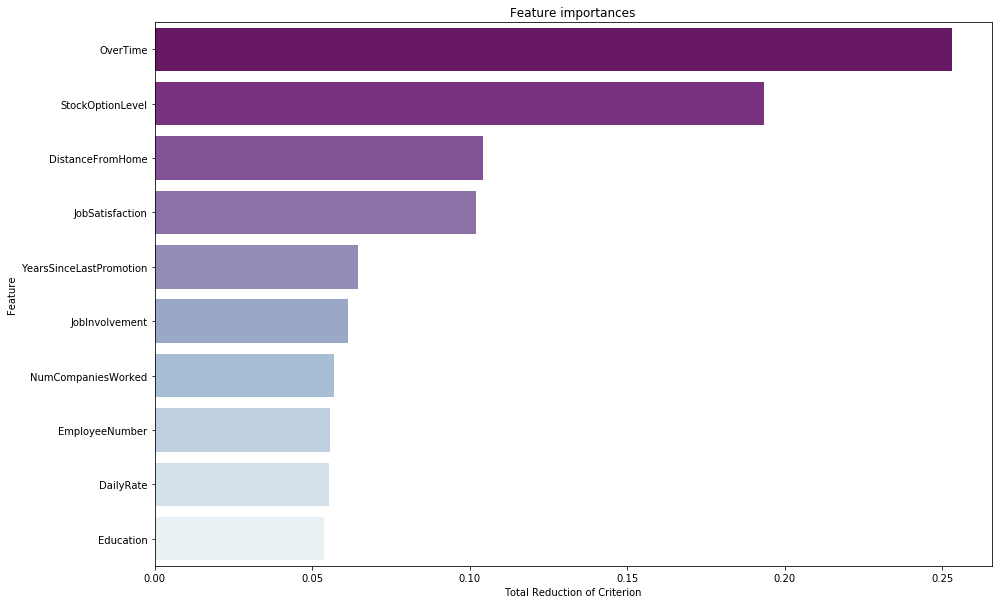

In [28]:
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
model_dt.fit(X_train, y_train)
importances = model_dt.feature_importances_ 
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

feature_names = X_train.columns 

fi = pd.DataFrame([feature_names[indices[0:10]], importances[indices][0:10]])
fi = fi.T
fi.columns = ['Feature', 'Total Reduction of Criterion']

print(fi)

plt.figure(figsize=(15,10))
plt.title("Feature importances")

sns.barplot(x="Total Reduction of Criterion", y="Feature", data=fi, palette="BuPu_r")

In [29]:
y_pred = model_dt.predict(X_test)
confusion_matrix_results = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n', confusion_matrix_results)
display_metrics('Decision Tree', y_pred, y_test)

confusion matrix: 
 [[364  16]
 [ 53   8]]
______________________________________________
Model: Decision Tree
Accuracy: 0.8435374149659864
Precision: 0.3333333333333333
Recall: 0.13114754098360656
F1-score: 0.18823529411764708
AUC: 0.5445211389128558
______________________________________________



In [30]:
accuracies_dt2 = []
max_depth = [5,6,7,8,9]
for i in max_depth: 
    model_dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=i)
    model_dt.fit(X_train, y_train)
    y_pred = model_dt.predict(X_test)
    acc = display_metrics_acc('Decision Tree',y_pred,y_test)
    
    accuracies_dt2.append(acc)
    
round(np.mean(accuracies_dt2),2)

0.83

In [31]:
accuracies_dt2

[0.8435374149659864,
 0.8435374149659864,
 0.8412698412698413,
 0.8027210884353742,
 0.8072562358276644]

### Random Forest 2

In [32]:
model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
model_rf.fit(X_train, y_train)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
y_pred = model_rf.predict(X_test)
confusion_matrix_results = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n', confusion_matrix_results)
display_metrics('Random Forest', y_pred, y_test)

confusion matrix: 
 [[379   1]
 [ 55   6]]
______________________________________________
Model: Random Forest
Accuracy: 0.873015873015873
Precision: 0.8571428571428571
Recall: 0.09836065573770492
F1-score: 0.17647058823529413
AUC: 0.5478645383951682
______________________________________________



In [33]:
accuracies_rf2 = []
random_forest = [10,100,250,500,750]
for i in random_forest: 
    model_rf = RandomForestClassifier(n_estimators=i, random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)
    confusion_matrix_results = confusion_matrix(y_test, y_pred)
    acc = display_metrics_acc('Random Forest', y_pred, y_test)
    accuracies_rf2.append(acc)
    
round(np.mean(accuracies_rf2),2)

0.87

In [34]:
accuracies_rf2

[0.8616780045351474,
 0.8662131519274376,
 0.8707482993197279,
 0.873015873015873,
 0.8707482993197279]

### Logistic Regression 2
### Sklearn 2

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)
display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[380   0]
 [ 59   2]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.8662131519274376
Precision: 1.0
Recall: 0.03278688524590164
F1-score: 0.06349206349206349
AUC: 0.5163934426229508
______________________________________________



In [36]:
X = sample.drop('Attrition',axis=1) 
y = sample['Attrition'] 

accuracies_lr2 = []
test_sizes = [0.3, 0.4, 0.5, 0.6, 0.7]
for i in test_sizes: 
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc, precision, recall, f1score, auc = classification_metrics(y_pred, y_test)
    accuracies_lr2.append(acc)
    
round(np.mean(accuracies_lr2),2)

0.86

In [37]:
accuracies_lr2

[0.8662131519274376,
 0.8622448979591837,
 0.8598639455782313,
 0.8514739229024944,
 0.8454810495626822]

### SVM 2

In [38]:
accuracies_svm2 = []
cs = [1, 5, 10]
gammas = [0.1, 0.5, 1.0]
for i in cs: 
    for j in gammas: 
        
        ####################################
        model_svm = SVC(C=i, gamma=j, random_state=42)
        model_svm.fit(X_train, y_train)
        y_pred = model_svm.predict(X_test)
        pre = display_metrics_acc('SVM', y_pred, y_test)
        accuracies_svm2.append(pre)
        
round(np.mean(accuracies_svm2),2)

0.84

In [40]:
accuracies_svm2

[0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864]

### Test Set 3 (df)
### Train the dataset 3

In [41]:
df = data.copy()
cat_feats = ['Gender','JobRole','BusinessTravel','Department','EducationField','MaritalStatus'] 
df = pd.get_dummies(data, columns=cat_feats, drop_first = True)
df = df.drop(['Over18'], axis=1)
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['PerformanceRating'] = df['PerformanceRating'].map({3: 0, 4: 1})
df = df.drop(['EmployeeCount','StandardHours'], axis=1) 

In [42]:
X = df.drop('Attrition',axis=1) 
y = df['Attrition'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Decision Tree 3

Feature ranking:
                       Feature Total Reduction of Criterion
0                     OverTime                     0.193786
1                MonthlyIncome                     0.154806
2            TotalWorkingYears                     0.088446
3                   HourlyRate                     0.070383
4             DistanceFromHome                     0.069096
5         MaritalStatus_Single                     0.063129
6               JobInvolvement                     0.048543
7             StockOptionLevel                     0.036156
8               YearsAtCompany                     0.031894
9           NumCompaniesWorked                     0.031768
10                 MonthlyRate                     0.029297
11             JobSatisfaction                     0.027442
12     YearsSinceLastPromotion                     0.026135
13              EmployeeNumber                     0.025831
14           PercentSalaryHike                     0.025826
15                   Da

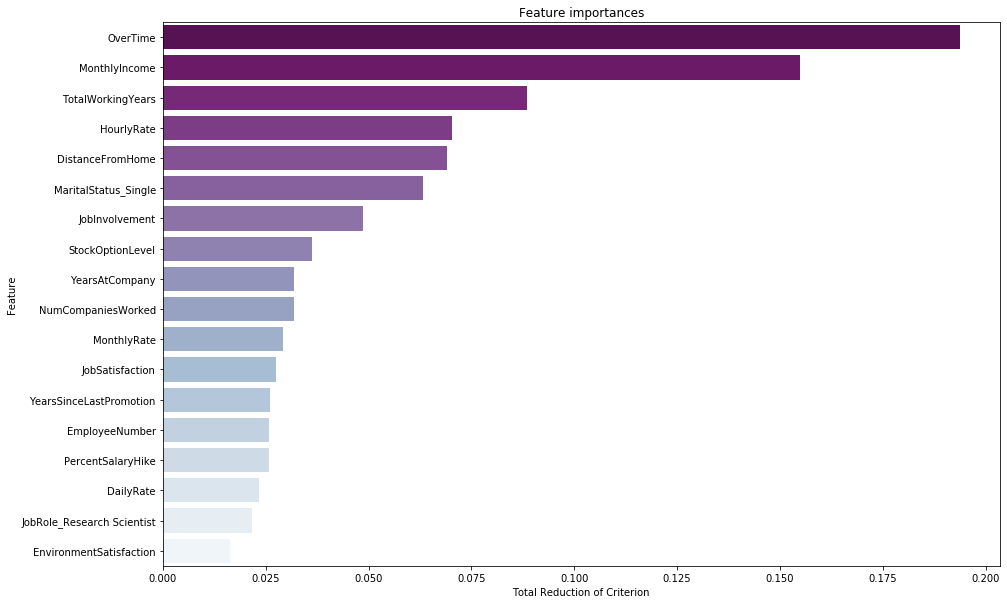

In [43]:
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
model_dt.fit(X_train, y_train)
importances = model_dt.feature_importances_ 
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

feature_names = X_train.columns 

fi = pd.DataFrame([feature_names[indices[0:18]], importances[indices][0:18]])
fi = fi.T
fi.columns = ['Feature', 'Total Reduction of Criterion']

print(fi)

plt.figure(figsize=(15,10))
plt.title("Feature importances")

sns.barplot(x="Total Reduction of Criterion", y="Feature", data=fi, palette="BuPu_r")

In [44]:
y_pred = model_dt.predict(X_test)
confusion_matrix_results = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n', confusion_matrix_results)
display_metrics('Decision Tree', y_pred, y_test)

confusion matrix: 
 [[362  18]
 [ 50  11]]
______________________________________________
Model: Decision Tree
Accuracy: 0.8458049886621315
Precision: 0.3793103448275862
Recall: 0.18032786885245902
F1-score: 0.24444444444444446
AUC: 0.5664797238999136
______________________________________________



In [45]:
accuracies_dt3 = []
max_depth = [5,6,7,8,9]
for i in max_depth: 
    model_dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=i)
    model_dt.fit(X_train, y_train)
    y_pred = model_dt.predict(X_test)
    acc = display_metrics_acc('Decision Tree',y_pred,y_test)
    
    accuracies_dt3.append(acc)
    
round(np.mean(accuracies_dt3),2)

0.83

In [46]:
accuracies_dt3

[0.8458049886621315,
 0.8435374149659864,
 0.8344671201814059,
 0.8344671201814059,
 0.8140589569160998]

### Random Forest 3

Feature ranking:
                    Feature Total Reduction of Criterion
0             MonthlyIncome                     0.075212
1                       Age                     0.056758
2                  OverTime                     0.052659
3         TotalWorkingYears                     0.049723
4            EmployeeNumber                     0.047634
5                 DailyRate                     0.046801
6               MonthlyRate                       0.0441
7                HourlyRate                     0.041745
8          DistanceFromHome                      0.04077
9            YearsAtCompany                     0.040394
10       NumCompaniesWorked                     0.034954
11     YearsWithCurrManager                       0.0318
12         StockOptionLevel                     0.031679
13       YearsInCurrentRole                     0.031083
14        PercentSalaryHike                     0.030597
15    TrainingTimesLastYear                     0.025045
16  YearsSince

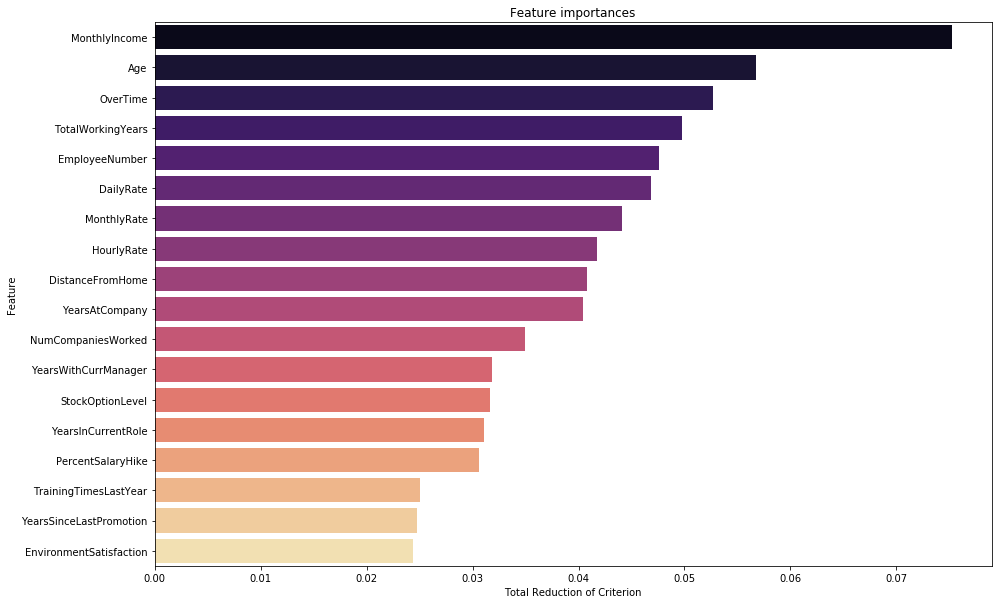

In [51]:
model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
model_rf.fit(X_train, y_train)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

feature_names = X_train.columns 

fi = pd.DataFrame([feature_names[indices[0:18]], importances[indices][0:18]])
fi = fi.T
fi.columns = ['Feature', 'Total Reduction of Criterion']
print(fi)


plt.figure(figsize=(15,10))
plt.title("Feature importances")

sns.set_color_codes("pastel")
sns.barplot(x="Total Reduction of Criterion", y="Feature", data=fi, palette="magma")

In [52]:
y_pred = model_rf.predict(X_test)
confusion_matrix_results = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n', confusion_matrix_results)
display_metrics('Random Forest', y_pred, y_test)

confusion matrix: 
 [[377   3]
 [ 56   5]]
______________________________________________
Model: Random Forest
Accuracy: 0.8662131519274376
Precision: 0.625
Recall: 0.08196721311475409
F1-score: 0.14492753623188404
AUC: 0.5370362381363245
______________________________________________



In [53]:
accuracies_rf3 = []
random_forest = [10,100,250,500,750]
for i in random_forest: 
    model_rf = RandomForestClassifier(n_estimators=i, random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)
    confusion_matrix_results = confusion_matrix(y_test, y_pred)
    acc = display_metrics_acc('Random Forest', y_pred, y_test)
    accuracies_rf3.append(acc)
    
round(np.mean(accuracies_rf3),2)

0.87

In [54]:
accuracies_rf3

[0.8639455782312925,
 0.8707482993197279,
 0.8662131519274376,
 0.8662131519274376,
 0.8662131519274376]

### Logistic Regression 3
### Sklearn

In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)
display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[380   0]
 [ 60   1]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.8639455782312925
Precision: 1.0
Recall: 0.01639344262295082
F1-score: 0.03225806451612903
AUC: 0.5081967213114754
______________________________________________



In [56]:
accuracies_lr3 = []
test_sizes = [0.3, 0.4, 0.5, 0.6, 0.7]
for i in test_sizes: 
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc, precision, recall, f1score, auc = classification_metrics(y_pred, y_test)
    
    accuracies_lr3.append(acc)
    
round(np.mean(accuracies_lr3),2)


0.85

In [57]:
accuracies_lr3

[0.8639455782312925,
 0.8622448979591837,
 0.85578231292517,
 0.8469387755102041,
 0.8338192419825073]

### SVM

In [58]:
model_svm = SVC(C=5, gamma=0.5, random_state=42)

model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

display_metrics('SVM', y_pred, y_test)


______________________________________________
Model: SVM
Accuracy: 0.8435374149659864
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC: 0.5
______________________________________________



In [59]:
accuracies_svm3 = []
cs = [1, 5, 10]
gammas = [0.1, 0.5, 1.0]
for i in cs: 
    for j in gammas: 
        
        ####################################
        model_svm = SVC(C=i, gamma=j, random_state=42)
        model_svm.fit(X_train, y_train)
        y_pred = model_svm.predict(X_test)
        pre = display_metrics_acc('SVM', y_pred, y_test)
        accuracies_svm3.append(pre)
        
round(np.mean(accuracies_svm3),2)

0.84

In [60]:
accuracies_svm3

[0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864]

### Naive Bayes 

In [61]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
confusion_matrix_results = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n', confusion_matrix_results)
display_metrics('Naive Bayes', y_pred, y_test)

confusion matrix: 
 [[667 201]
 [ 62  99]]
______________________________________________
Model: Naive Bayes
Accuracy: 0.7444120505344995
Precision: 0.33
Recall: 0.6149068322981367
F1-score: 0.4295010845986985
AUC: 0.6916700060108195
______________________________________________

